In [1]:
import requests
import os
import pandas as pd

dataset_dir_corn = '../img/tests/corn'

In [2]:
def define_targets(dataset_dir):
    # Loop over the subdirectories and image files in the dataset directory
    X = []
    y = []
    for label in os.listdir(dataset_dir):
        label_dir = os.path.join(dataset_dir, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                # Construct the full image path
                img_path = os.path.join(label_dir, file)
                try:
                    # Extract features and append to list
                    #features = extract_features(img_path, base_model)
                    X.append(img_path)
                    # Append the label
                    y.append(label)
                except Exception as e:
                    print(f"Error processing file {img_path}: {e}")
    return X, y

In [3]:


# URL do servidor local
SERVER_URL = "http://localhost:8080/predict"

# Caminho da imagem
#image_path = "caminho_para_a_imagem.jpg"

# Nome da planta ('corn', 'tomato', ou 'potato')
plant_name = "corn"  # Altere conforme necessário

def send_image(image_path, plant_name):
    # Abrir a imagem em modo de leitura binária
    with open(image_path, 'rb') as img_file:
        # Arquivo da imagem e dados adicionais (nome da planta)
        files = {'image': img_file}
        data = {'name': plant_name}

        # Fazer a requisição POST
        response = requests.post(SERVER_URL, files=files, data=data)

        # Verificar a resposta do servidor
        if response.status_code == 200:
            return response.json().get('predictions', [])
        else:
            print(f"Erro: {response.status_code}")
            return None




In [4]:
image_paths, y_real = define_targets(dataset_dir_corn)
results = []

In [5]:
for image_path, real_label in zip(image_paths, y_real):
    predicted_labels = send_image(image_path, plant_name)

    if predicted_labels:
        predicted_label = predicted_labels[0]  # Supondo que haja uma única predição
        print(f"Imagem: {image_path}")
        print(f"Real: {real_label}, Predito: {predicted_label}\n")
        
        # Armazenar o resultado na lista
        results.append({
            "image_path": image_path,
            "real_label": real_label,
            "predicted_label": predicted_label
        })

# Converter a lista de resultados para um DataFrame do pandas
df = pd.DataFrame(results)

Imagem: ../img/tests/corn\common rust\1.png
Real: common rust, Predito: Cercospora_leaf_spot Gray_leaf_spot

Imagem: ../img/tests/corn\common rust\10.jpg
Real: common rust, Predito: Cercospora_leaf_spot Gray_leaf_spot

Imagem: ../img/tests/corn\common rust\2.jpg
Real: common rust, Predito: Cercospora_leaf_spot Gray_leaf_spot

Imagem: ../img/tests/corn\common rust\3.jpg
Real: common rust, Predito: Cercospora_leaf_spot Gray_leaf_spot

Imagem: ../img/tests/corn\common rust\4.jpg
Real: common rust, Predito: Cercospora_leaf_spot Gray_leaf_spot

Imagem: ../img/tests/corn\common rust\5.jpg
Real: common rust, Predito: Common_rust

Imagem: ../img/tests/corn\common rust\6.jpg
Real: common rust, Predito: Northern_Leaf_Blight

Imagem: ../img/tests/corn\common rust\7.jpg
Real: common rust, Predito: Cercospora_leaf_spot Gray_leaf_spot

Imagem: ../img/tests/corn\common rust\8.jpg
Real: common rust, Predito: Cercospora_leaf_spot Gray_leaf_spot

Imagem: ../img/tests/corn\common rust\9.jpg
Real: common 

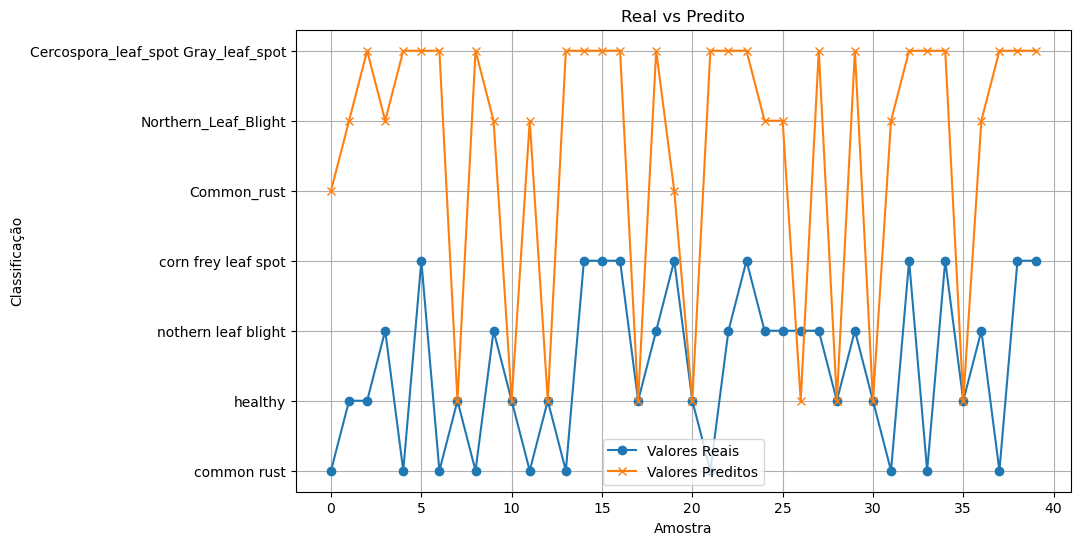

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Carregar o CSV com os resultados
#df = pd.read_csv("resultados_classificacao.csv")

# Função para criar o gráfico "Real vs Predito"
def plot_real_vs_pred(y_real, y_pred):
    plt.figure(figsize=(10, 6))
    
    # Plotar valores reais e preditos
    plt.plot(y_real, label="Valores Reais", marker='o')
    plt.plot(y_pred, label="Valores Preditos", marker='x')

    # Adicionar título e legendas
    plt.title("Real vs Predito")
    plt.xlabel("Amostra")
    plt.ylabel("Classificação")
    plt.legend()
    plt.grid(True)
    
    # Mostrar o gráfico
    plt.show()

# Extraindo os valores reais e preditos do DataFrame
y_real = df['real_label'].tolist()
y_pred = df['predicted_label'].tolist()

# Criar uma lista de tuplas (valor_real, valor_predito) para manter a correspondência
combined = list(zip(y_real, y_pred))

# Embaralhar os valores mantendo a correspondência entre real e predito
combined_shuffled = shuffle(combined)

# Separar novamente os valores reais e preditos embaralhados
y_real_shuffled, y_pred_shuffled = zip(*combined_shuffled)

# Plotar o gráfico com os valores embaralhados
plot_real_vs_pred(y_real_shuffled, y_pred_shuffled)

In [27]:
df

,image_path,real_label,predicted_label
0,../img/tests/corn\common rust\1.png,common rust,Cercospora_leaf_spot Gray_leaf_spot
1,../img/tests/corn\common rust\10.jpg,common rust,Cercospora_leaf_spot Gray_leaf_spot
2,../img/tests/corn\common rust\2.jpg,common rust,Cercospora_leaf_spot Gray_leaf_spot
3,../img/tests/corn\common rust\3.jpg,common rust,Cercospora_leaf_spot Gray_leaf_spot
4,../img/tests/corn\common rust\4.jpg,common rust,Cercospora_leaf_spot Gray_leaf_spot
...,...,...,...
75,../img/tests/corn\nothern leaf blight\5.jpg,nothern leaf blight,Cercospora_leaf_spot Gray_leaf_spot
76,../img/tests/corn\nothern leaf blight\6.jpg,nothern leaf blight,Northern_Leaf_Blight
77,../img/tests/corn\nothern leaf blight\7.jpg,nothern leaf blight,Cercospora_leaf_spot Gray_leaf_spot
78,../img/tests/corn\nothern leaf blight\8.JPG,nothern leaf blight,Northern_Leaf_Blight
